In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('reviews_data_dump/reviews_badminton/data.csv')
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


### EDA on Reviews

In [3]:
df.shape

(8518, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [5]:
df.describe()

,Up Votes,Down Votes,Ratings
count,8508.000000,8508.000000,8518.000000
mean,0.391396,0.121768,4.181028
std,11.613909,3.248022,1.262200
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,889.000000,219.000000,5.000000


In [6]:
df['Review Title'].isna().sum()

10

In [7]:
df['Review text'].isna().sum()

8

In [8]:
df.dropna(subset=['Review Title','Review text'], inplace=True)

In [9]:
df['Review text'].value_counts().sum()

8508

In [10]:
df["Ratings"].value_counts(normalize=True)

Ratings
5    0.596850
4    0.204984
1    0.089915
3    0.072285
2    0.035966
Name: proportion, dtype: float64

<Axes: xlabel='Ratings'>

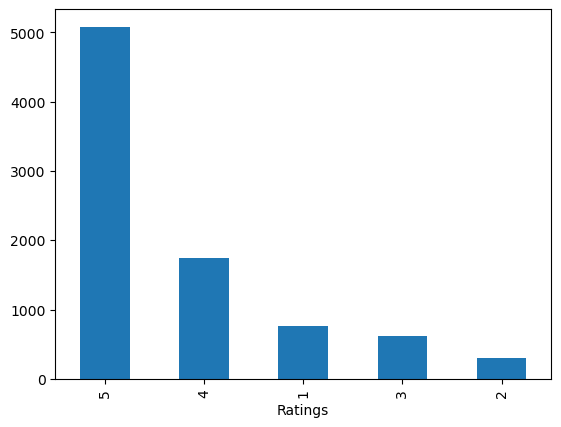

In [11]:
df["Ratings"].value_counts().plot.bar()

In [12]:
# Visuallizing an overall Word Cloud from the given data

from wordcloud import WordCloud

wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(df['Review text']))

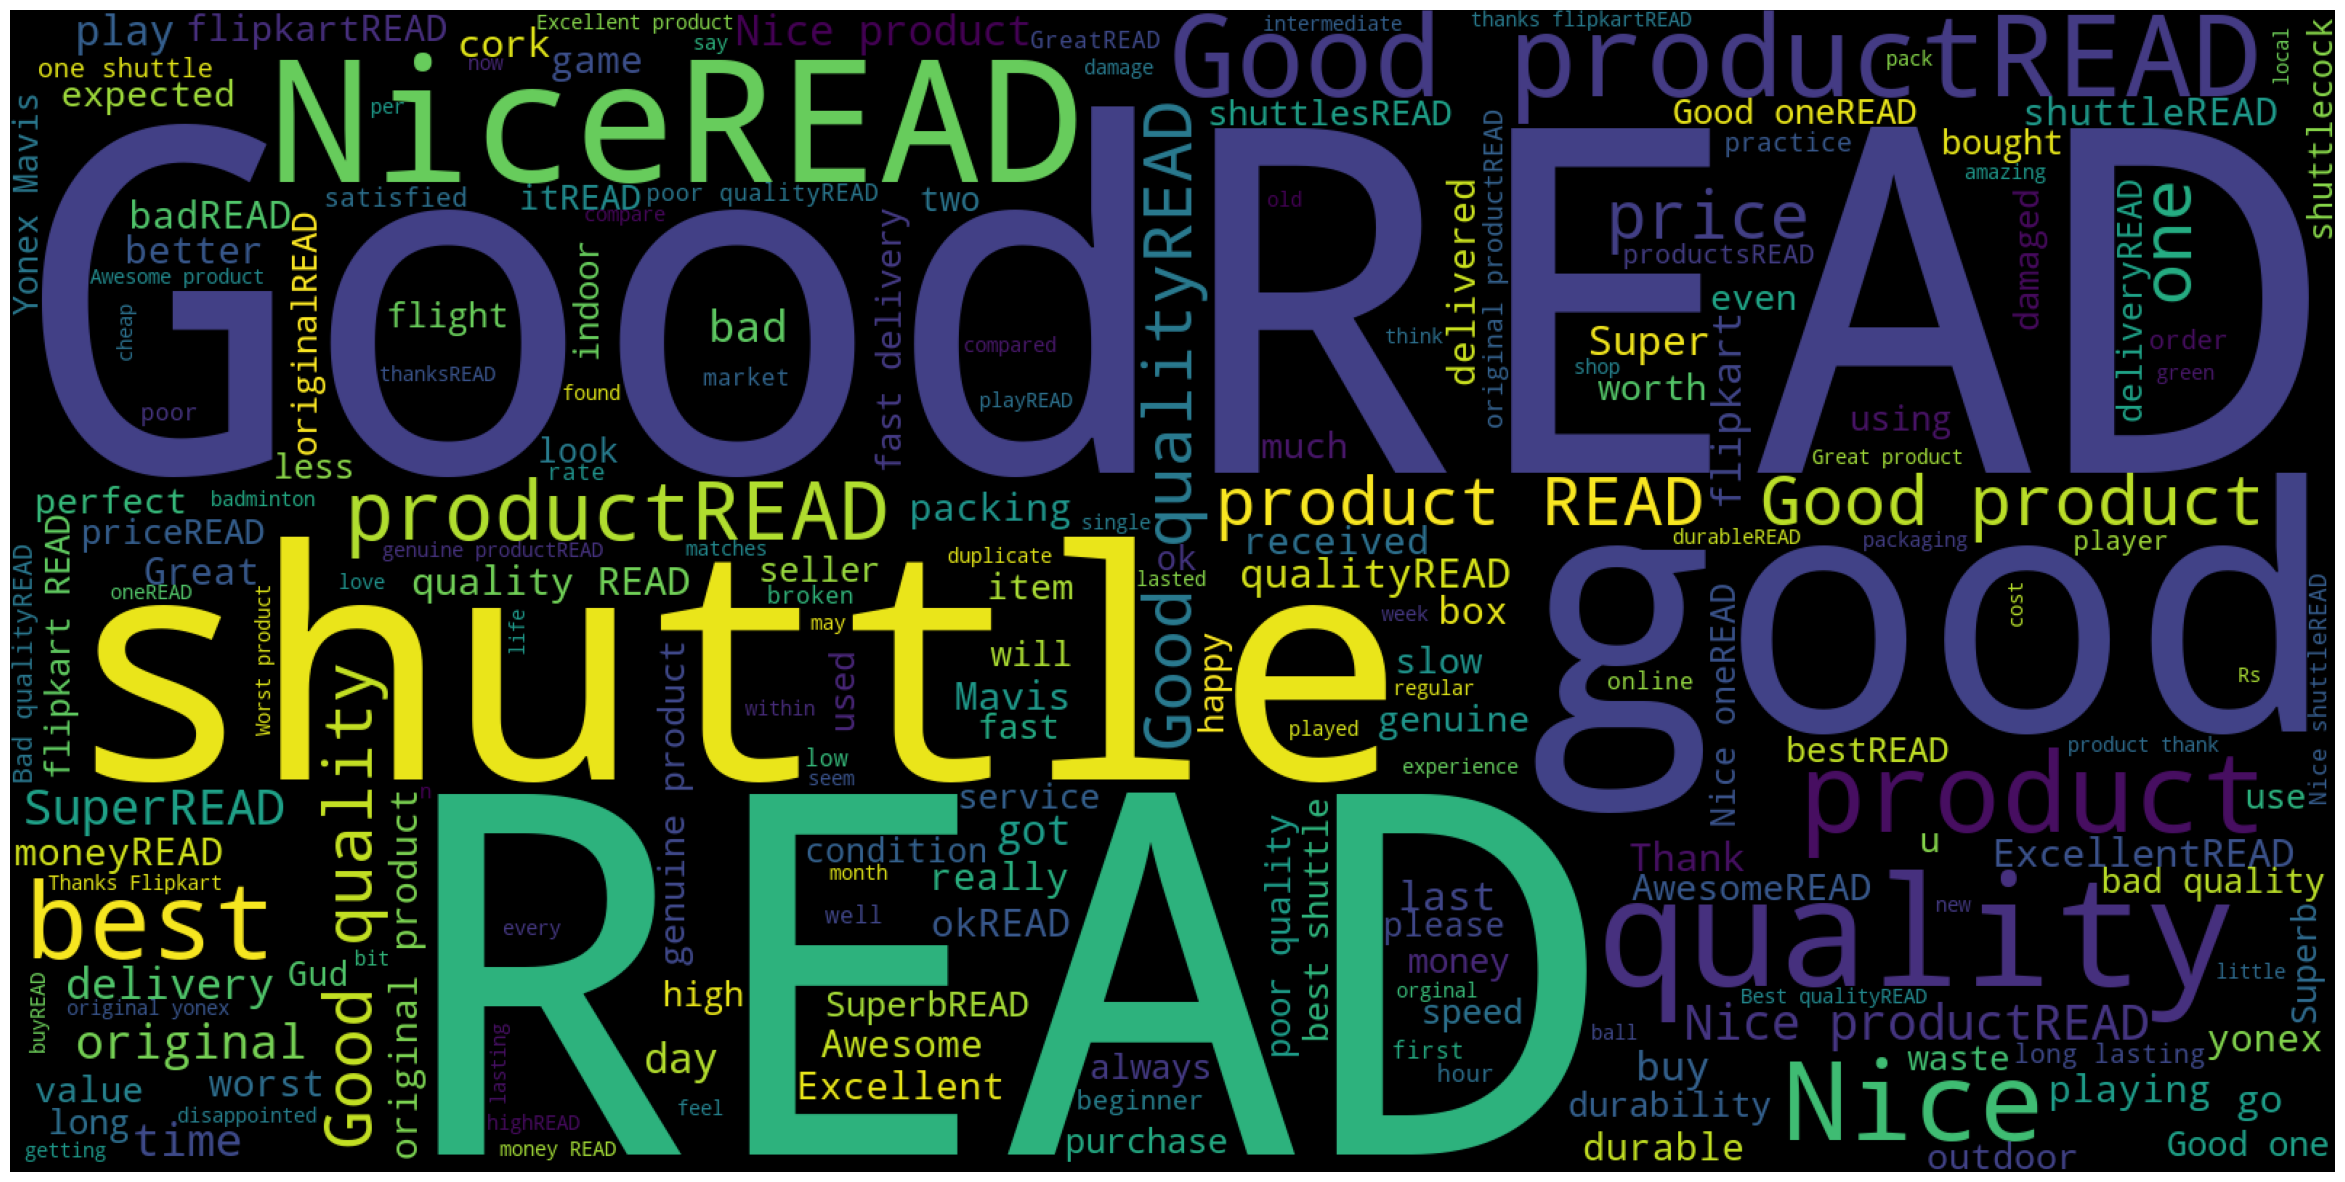

In [13]:
import matplotlib.pyplot as plt

plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [14]:
df['Sentiment'] = df['Ratings'].apply(lambda x: 'neutral' if x==3 else ('positive' if x>3 else 'negative'))

#### **Step 1 - Identify Input and Output**

In [15]:
# Step 1: Identify Input and Output

X = df['Review text']
y = df['Sentiment']
print(X.shape, y.shape)

(8508,) (8508,)


#### **Step 2 - Split the Data into Train and Test**

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6806,) (6806,)
(1702,) (1702,)


In [17]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\krant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
def preprocess(text):
    # creating a variable consist of english stopwords
    eng_stopwords = stopwords.words("english")
    # removing 'READ MORE' 
    text = re.sub('READ MORE', '', str(text))
    # removing punctuations
    text = re.sub("[^a-zA-Z]", " ", text)

    # converting to lower case
    text = text.lower()

    # removing the stopwords
    return " ".join([word for word in word_tokenize(text) if word not in eng_stopwords])

In [20]:
X_train[0]

'Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE'

In [21]:
preprocess(X_train[0])

'nice product good quality price rising bad sign affordable price especially play everyday kindly help us terms price thank'

#### **Step 3 - Data Preprocessing on train data (X_train)**


In [22]:
X_train = X_train.apply(preprocess)
X_train

6215    good acceptable product dilivery also good
8305                                  nice project
3419                                  good shuttle
5721                                          good
134                                    bad quality
                           ...                    
2895                                  quality good
7813                       bad really good quality
905                                           good
5192                                           bad
235                                    bad quality
Name: Review text, Length: 6806, dtype: object

#### **Step 3 - Data Preprocessing on train data (X_test)**

In [23]:
X_test = X_test.apply(preprocess)
X_test

3477                                     perfect original
5465                            best intermediate players
4600         price goodquality goodand also fast delivery
6363                                                happy
3178                                         good product
                              ...                        
6870    shuttles different compared buy showroom know ...
4484                                            good hard
3774                            yonox yonox great quality
6279                                            bad corck
4485                                 super really amazing
Name: Review text, Length: 1702, dtype: object

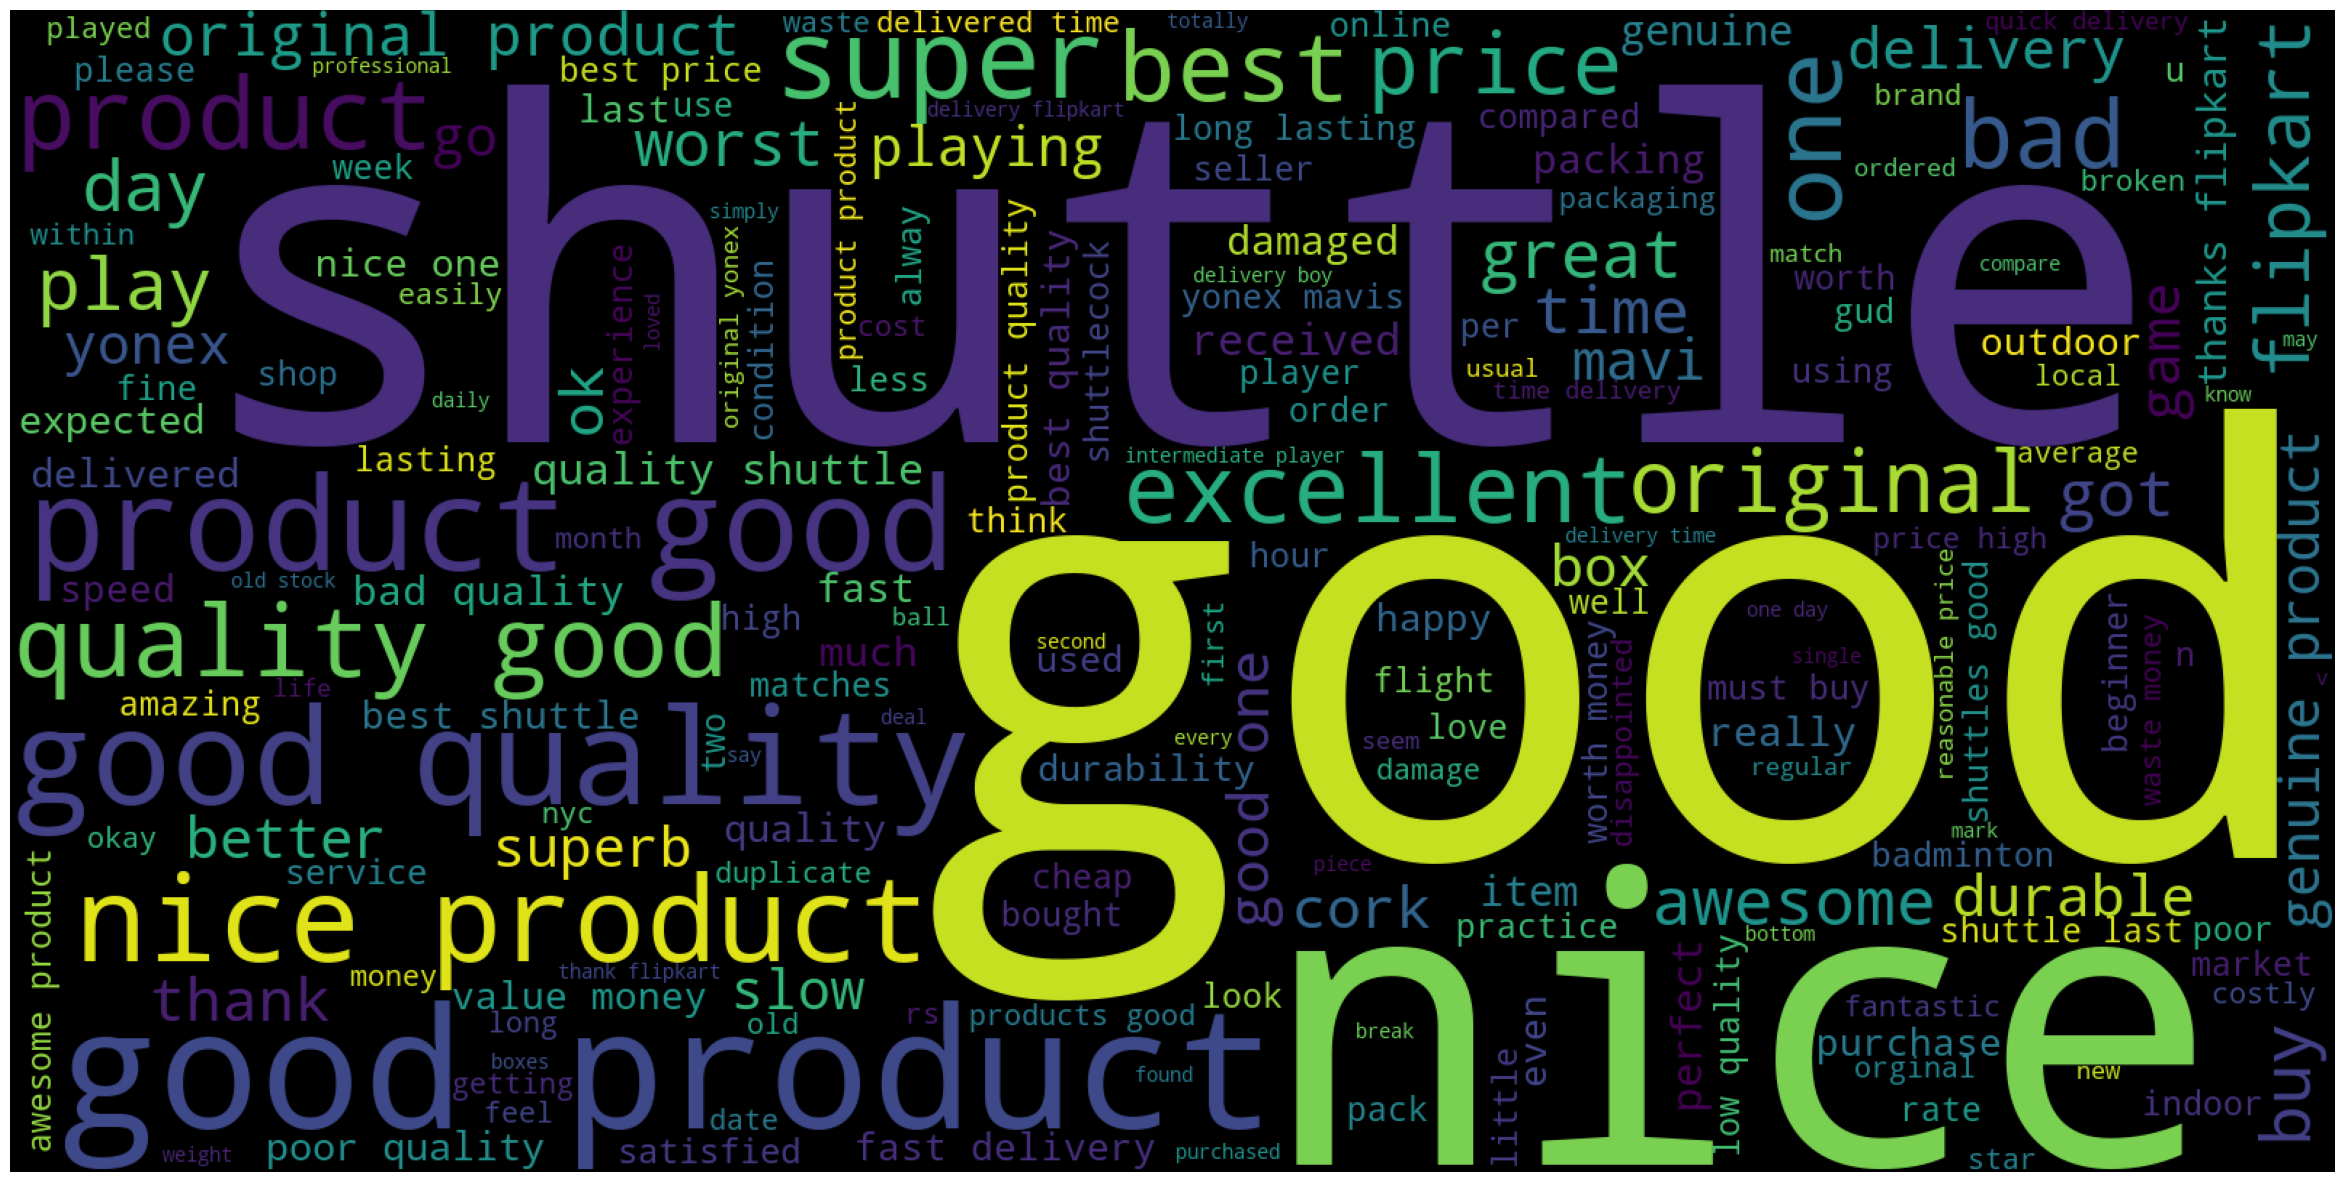

In [25]:
wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(X_train))
plt.figure(1,figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [26]:
y_train

6215    positive
8305    positive
3419    positive
5721    positive
134     negative
          ...   
2895    positive
7813    positive
905     positive
5192    negative
235     negative
Name: Sentiment, Length: 6806, dtype: object

# **Machine Learning Model**

In [ ]:
#pip install mlflow

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
import mlflow

mlflow.set_experiment("Flipkart_Sentiment_Analysis")

<Experiment: artifact_location='file:///C:/Users/krant/Desktop/Internship%20Projects/Sentiment%20Analysis%20of%20Flipkart%20Product%20Reviews/mlruns/160401224703597744', creation_time=1714100581081, experiment_id='160401224703597744', last_update_time=1714100581081, lifecycle_stage='active', name='Flipkart_Sentiment_Analysis', tags={}>

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [33]:
import os
import joblib
from joblib import Memory

cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

In [35]:
pipelines = {
    'knn': Pipeline([
        ("vect", CountVectorizer()),
        ('clf', KNeighborsClassifier())
    ], memory=memory),
    "random_forest": Pipeline([
        ("vect", CountVectorizer()),
        ("clf", RandomForestClassifier())
    ], memory=memory),
    'svc': Pipeline([
        ("vect", CountVectorizer()),
        ('clf', SVC())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ("vect", CountVectorizer()),
        ('clf', LogisticRegression())
    ], memory=memory)
}

param_grids = {
    'knn': [
        {
            'vect': [CountVectorizer(), TfidfVectorizer()],
            'clf__n_neighbors': [i for i in range(3, 21, 2)], 
            'clf__p': [1, 2, 3]
        }
    ],
    'random_forest': [
        {
            'vect': [CountVectorizer(), TfidfVectorizer()],
            'clf__n_estimators': [50, 100, 200]
        }
    ],
    'svc': [
        {
            'vect': [CountVectorizer(), TfidfVectorizer()],
            'clf__kernel': ['rbf'], 
            'clf__C': [0.1, 0.01, 1, 10, 100]
        }, 
        {
            'vect': [CountVectorizer(), TfidfVectorizer()],
            'clf__kernel': ['poly'], 
            'clf__degree': [2, 3, 4, 5], 
            'clf__C': [0.1, 0.01, 1, 10, 100]
        }, 
        {
            'vect': [CountVectorizer(), TfidfVectorizer()],
            'clf__kernel': ['linear'], 
            'clf__C': [0.1, 0.01, 1, 10, 100]
        }
    ],
    'logistic_regression': [
        {
            'vect': [CountVectorizer(), TfidfVectorizer()],
            'clf__C': [0.1, 1, 10], 
            'clf__penalty': ['l2']
        }, 
        {
            'vect': [CountVectorizer(), TfidfVectorizer()],
            'clf__C': [0.1, 1, 10], 
            'clf__penalty': ['l1'], 
            'clf__solver': ['liblinear']
        }, 
        {
            'vect': [CountVectorizer(), TfidfVectorizer()],
            'clf__C': [0.1, 1, 10], 
            'clf__penalty': ['elasticnet'], 
            'clf__l1_ratio': [0.4, 0.5, 0.6],
            'clf__solver': ['saga']
        }
    ]
}

best_models = {}

# Run the Pipeline
for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    with mlflow.start_run() as run:
        %time grid_search.fit(X_train, y_train)
        
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test, y_test))
    
    print()

********** knn **********
Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: total: 4min 49s
Wall time: 6min 22s
Train Score:  0.8524822488431134
Test Score:  0.8460634547591069

********** random_forest **********
Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 2min 17s
Wall time: 5min 58s
Train Score:  0.853365895552743
Test Score:  0.8607520564042304

********** svc **********
Fitting 5 folds for each of 60 candidates, totalling 300 fits
CPU times: total: 4min 42s
Wall time: 11min 46s
Train Score:  0.8590955730270888
Test Score:  0.8607520564042304

********** logistic_regression **********
Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: total: 2min 12s
Wall time: 5min 19s
Train Score:  0.8608590901783584
Test Score:  0.8660399529964747



In [44]:
model_dir="best_models"
os.makedirs(model_dir,exist_ok=True)
joblib.dump(grid_search.best_estimator_, 'best_models/best_model.pkl')

['best_models/best_model.pkl']

In [45]:
model = joblib.load('best_models/best_model.pkl')

In [46]:
test = ['Worst product. Damaged shuttlecocks packed']

In [47]:
print(model.predict(test))

['negative']
